![HeathCare_Analysis_Cover_Image](images/cover_images.jpeg)

# HEALTHCARE DATA ANALYSIS 

## 1.0 BUSINESS UNDERSTANDING

### PROBLEM STATEMENT
### OBJECTIVES



## 2.0 DATA UNDERSTANDING

In [5]:
#Importing python libraries
import os
import missingno
import pandas as pd
from classes import *
from IPython.display import display, HTML

# libraries for visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


## 3.0 DATA PREPARATION
The following steps in summary shall be followed in the data preparation stage in preparation for Modeling in later stages

 3.**1. Data Loading**      
- Load the Datasets
         
- Inspect the Data

      3.   
 **2. Data Cleaning**
 
- Validity Check

- Consistency Check

- Uniformity Check

- Completeness Check

### 3.1 DATA LOADING 
The following was carried out 
1. Loading the Datasets
         
2. Inspecting the Data

In [8]:
# Instantiate the DataLoader class
loader= DataLoader()

# Reading the csv file
df=loader.read_data("Healthcare Dataset.xlsx").set_index('_index')

# Instantiate the DataInfo class
summary= DataInfo()

# Summary view of the dataset information
summary.info(df)

# setting to view all columns and rows
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

Shape of the dataset : (6158, 31) 

Column Names
Index(['Location', '_Location_latitude', '_Location_longitude',
       '_Location_altitude', '_Location_precision', 'Date and Time', 'Age',
       'Gender', 'Marital Status', 'How many children do you have, if any?',
       'Employment Status', 'Monthly Household Income',
       'Have you ever had health insurance?', 'If yes, which insurance cover?',
       'When was the last time you visited a hospital for medical treatment? (In Months)',
       'Did you have health insurance during your last hospital visit?',
       'Have you ever had a routine check-up with a doctor or healthcare provider?',
       'If you answered yes to the previous question, what time period (in years) do you stay before having your routine check-up?',
       'Have you ever had a cancer screening (e.g. mammogram, colonoscopy, etc.)?',
       'If you answered yes to the previous question, what time period (in years) do you stay before having your Cancer screening?',

,_Location_latitude,_Location_longitude,_Location_altitude,_Location_precision,Date and Time,"How many children do you have, if any?",When was the last time you visited a hospital for medical treatment? (In Months),Your Picture,Your Picture_URL,_id,_submission_time,_validation_status,_notes,_tags
count,5805.000000,5805.000000,5805.000000,5805.000000,6010,5533.000000,6000.000000,0.0,0.0,6.158000e+03,6158,0.0,0.0,0.0
mean,-0.737841,36.715208,1536.439555,71.217272,2023-06-23 12:19:03.484193280,147.165371,6.651875,NaN,NaN,2.482603e+08,2023-06-25 04:21:26.056349440,NaN,NaN,NaN
min,-4.051936,34.092111,-201.295000,0.000000,2023-05-15 08:35:00,0.000000,0.000000,NaN,NaN,2.301624e+08,2023-04-05 08:44:06,NaN,NaN,NaN
25%,-1.259315,36.379644,1348.900024,4.100000,2023-06-16 10:18:30,1.000000,2.000000,NaN,NaN,2.469582e+08,2023-06-19 10:27:25.750000128,NaN,NaN,NaN
50%,-0.726425,36.866007,1592.900024,4.820000,2023-06-23 10:22:00,2.000000,4.000000,NaN,NaN,2.486249e+08,2023-06-26 09:56:12.500000,NaN,NaN,NaN
75%,-0.378057,37.146309,1857.600000,7.196000,2023-06-30 15:33:30,3.000000,8.000000,NaN,NaN,2.499817e+08,2023-07-03 13:40:47,NaN,NaN,NaN
max,1.842157,39.692109,2988.477000,4900.000000,2023-07-27 12:00:00,800159.000000,2021.000000,NaN,NaN,2.584794e+08,2023-08-07 09:12:14,NaN,NaN,NaN
std,0.870519,0.866878,494.157138,388.100302,NaN,10757.084650,37.295530,NaN,NaN,2.565886e+06,NaN,NaN,NaN,NaN


Dataset Overview


,Location,_Location_latitude,_Location_longitude,_Location_altitude,_Location_precision,Date and Time,Age,Gender,Marital Status,"How many children do you have, if any?",Employment Status,Monthly Household Income,Have you ever had health insurance?,"If yes, which insurance cover?",When was the last time you visited a hospital for medical treatment? (In Months),Did you have health insurance during your last hospital visit?,Have you ever had a routine check-up with a doctor or healthcare provider?,"If you answered yes to the previous question, what time period (in years) do you stay before having your routine check-up?","Have you ever had a cancer screening (e.g. mammogram, colonoscopy, etc.)?","If you answered yes to the previous question, what time period (in years) do you stay before having your Cancer screening?",Your Picture,Your Picture_URL,_id,_uuid,_submission_time,_validation_status,_notes,_status,_submitted_by,__version__,_tags
_index,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,-0.2742007 36.058336 1882.2000732421875 20.0,-0.274201,36.058336,1882.200073,20.0,NaT,41-50,Female,Married,2.0,Self-employed,20001-30000,Yes,Nhif,53.0,No,Yes,2,No,2,NaN,NaN,230162389,aa30304f-84f2-4c1b-b30a-371241f2ff17,2023-04-05 08:44:06,NaN,NaN,submitted_via_web,NaN,vJ8gEKnN2pccxThc5jnkz4,NaN
2,-0.7158125 37.1475058 1361.9000244140625 20.0,-0.715812,37.147506,1361.900024,20.0,2023-05-15 13:38:00,18-30,Male,Single,0.0,Unemployed,Less than 10000,No,NaN,8.0,No,Yes,1,No,NaN,NaN,NaN,238299334,63c461e3-b3ef-47cf-9632-0c912a639f46,2023-05-15 10:44:01,NaN,NaN,submitted_via_web,safra_data,vMrCPR7NLZZJrf4PTsQ8uH,NaN
3,-0.7158157 37.1475082 1361.9000244140625 20.0,-0.715816,37.147508,1361.900024,20.0,2023-05-15 13:49:00,41-50,Female,Married,5.0,Self-employed,20001-30000,No,Nhif,6.0,Yes,No,NaN,Yes,4+,NaN,NaN,238301092,4209a55d-a983-433f-8ce0-bce6cd28d713,2023-05-15 10:51:08,NaN,NaN,submitted_via_web,safra_data,vMrCPR7NLZZJrf4PTsQ8uH,NaN
4,-0.7157082 37.14749 1361.9000244140625 20.0,-0.715708,37.147490,1361.900024,20.0,2023-05-15 14:19:00,18-30,Male,Single,NaN,Self-employed,10001-20000,Yes,Nhif,16.0,Yes,No,NaN,No,NaN,NaN,NaN,238311207,2eba9b13-1706-4faf-b7a7-e45e9dcf48ab,2023-05-15 11:22:19,NaN,NaN,submitted_via_web,safra_data,vMrCPR7NLZZJrf4PTsQ8uH,NaN
5,-0.7157337 37.1474799 1361.9000244140625 20.0,-0.715734,37.147480,1361.900024,20.0,2023-05-15 14:30:00,41-50,Male,Married,7.0,Self-employed,20001-30000,Yes,Nhif,13.0,Yes,No,NaN,Yes,4+,NaN,NaN,238314477,1f49cb82-75ff-4391-b69b-973a6ce698ee,2023-05-15 11:33:21,NaN,NaN,submitted_via_web,safra_data,vMrCPR7NLZZJrf4PTsQ8uH,NaN


**Observation**
***

- Dataset has 6158 rows and 31 columns


### 3.2 DATA CLEANING
 
- Uniformity Check
  
- Validity Check

- Consistency Check

- Completeness Check
  
- Accuracy Check

***
#### 3.2.1 UNIFORMITY CHECK
***
- Renaming Columns
- Cleaning columns

In [14]:
# Renaming of columns
mapping={
    "How many children do you have, if any?":"no_of_children",
    "Have you ever had health insurance?": "had_health_insurance?",
    "If yes, which insurance cover?":"insurer",
    "When was the last time you visited a hospital for medical treatment? (In Months) ":"last_visit",
    "Did you have health insurance during your last hospital visit?":"had_health_insurance_during_visit?",
    "Have you ever had a routine check-up with a doctor or healthcare provider?":"had_routine_checkup_with_doctor",
    "If you answered yes to the previous question, what time period (in years) do you stay before having your routine check-up?":"years_since_last_checkup",
    "Have you ever had a cancer screening (e.g. mammogram, colonoscopy, etc.)?":"had_cancer_screening?",
    "If you answered yes to the previous question, what time period (in years) do you stay before having your Cancer screening?":"years_since_last_cancer_screening",
    "When was the last time you visited a hospital for medical treatment? (In Months)":"months_since_last_hospital_visit",
    "_Location_latitude":"location_latitude",
    "_Location_longitude":"location_longitude",
    "_Location_altitude":"location_altitude",
    "_Location_precision":"Location_precision",
    "_id":"id",
    "_submission_time":"submission_time"

}
df.rename(columns=mapping, inplace= True)


In [15]:
# ensuring all column names are uniform
df.columns=df.columns.str.lower()
df.columns=df.columns.str.replace(" ","_")
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6158 entries, 1 to 6158
Data columns (total 31 columns):
 #   Column                              Non-Null Count  Dtype         
---  ------                              --------------  -----         
 0   location                            5805 non-null   object        
 1   location_latitude                   5805 non-null   float64       
 2   location_longitude                  5805 non-null   float64       
 3   location_altitude                   5805 non-null   float64       
 4   location_precision                  5805 non-null   float64       
 5   date_and_time                       6010 non-null   datetime64[ns]
 6   age                                 6140 non-null   object        
 7   gender                              6141 non-null   object        
 8   marital_status                      6140 non-null   object        
 9   no_of_children                      5533 non-null   float64       
 10  employment_status            

***
#### 3.2.2 CONSISTENCY CHECK
***
- Duplicated rows
- Cross-Field Consistency
- Data Validation


In [17]:
# check for duplicated rows
df.duplicated().sum()

0

In [18]:
df[df["employment_status"]=="Unemployed"]["monthly_household_income"].value_counts()

monthly_household_income
Less than 10000    1413
10001-20000         349
20001-30000          85
40001-50000          25
50001+               16
30001-40000           3
Name: count, dtype: int64

In [19]:
df["had_health_insurance?"].value_counts()

had_health_insurance?
Yes    3558
No     2581
Name: count, dtype: int64

In [20]:
df.isna().sum()

location                               353
location_latitude                      353
location_longitude                     353
location_altitude                      353
location_precision                     353
date_and_time                          148
age                                     18
gender                                  17
marital_status                          18
no_of_children                         625
employment_status                       24
monthly_household_income               259
had_health_insurance?                   19
insurer                               2540
months_since_last_hospital_visit       158
had_health_insurance_during_visit?      56
had_routine_checkup_with_doctor         23
years_since_last_checkup              4382
had_cancer_screening?                   31
years_since_last_cancer_screening     4593
your_picture                          6158
your_picture_url                      6158
id                                       0
_uuid      

***
#### 3.2.3 VALIDITY CHECK

***
- Irrelevant Data
- Outliers


In [22]:
# Dropping all columns with null values
to_delete=['__version__','_status','_submitted_by','_uuid']

# Dropping columns
df.drop(columns=to_delete, inplace= True, axis=1)
df = df.dropna(axis=1, how='all')
df.shape

(6158, 22)

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6158 entries, 1 to 6158
Data columns (total 22 columns):
 #   Column                              Non-Null Count  Dtype         
---  ------                              --------------  -----         
 0   location                            5805 non-null   object        
 1   location_latitude                   5805 non-null   float64       
 2   location_longitude                  5805 non-null   float64       
 3   location_altitude                   5805 non-null   float64       
 4   location_precision                  5805 non-null   float64       
 5   date_and_time                       6010 non-null   datetime64[ns]
 6   age                                 6140 non-null   object        
 7   gender                              6141 non-null   object        
 8   marital_status                      6140 non-null   object        
 9   no_of_children                      5533 non-null   float64       
 10  employment_status            

**Observations:**
- Upon dropping columns that contain no values, dataset has 26 columns
- Futher columns containing superfluous information were deleted as above
- dataset now has 22 columns and 6158 rows

***********************************************
Columns Containing Outliers Include: ['location_latitude', 'location_longitude', 'location_altitude', 'location_precision', 'date_and_time', 'no_of_children', 'months_since_last_hospital_visit', 'id', 'submission_time']
***********************************************


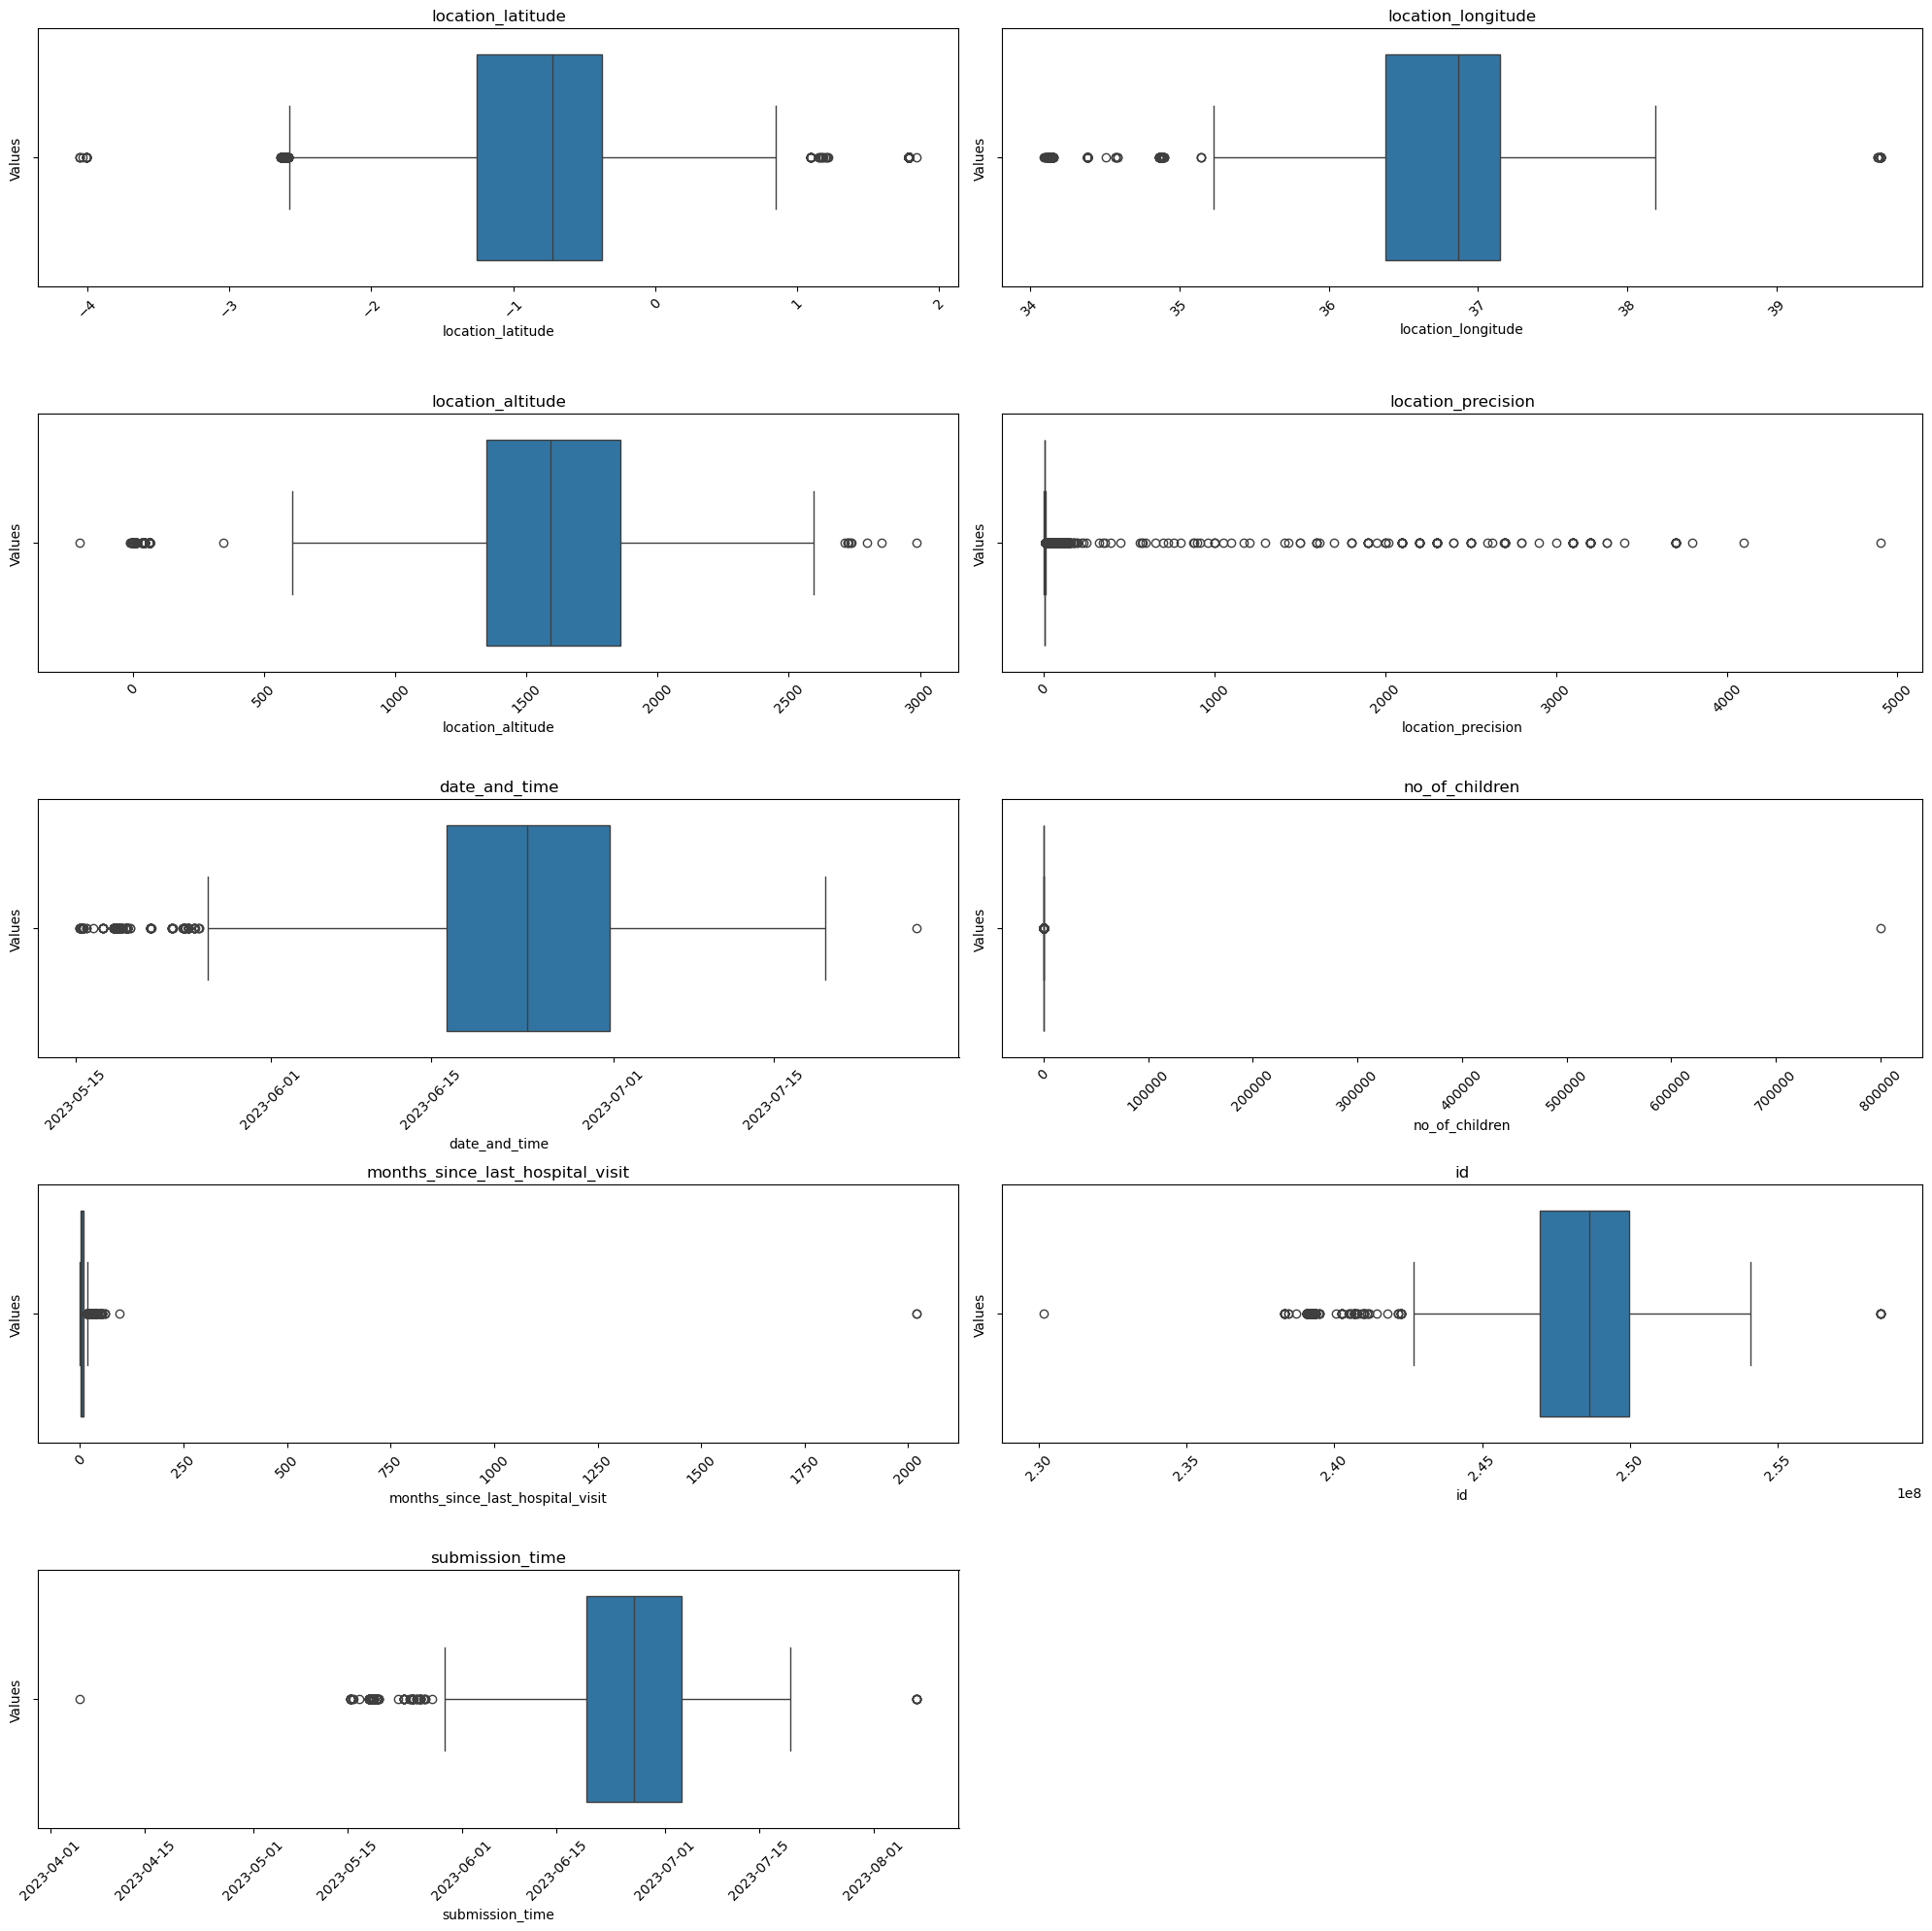

In [25]:
EDA_checks = EDA(df)
EDA_checks.check_outliers_and_plot()

In [26]:

# # List of columns with potential outliers
# columns_with_outliers = ['no_of_children']

# # Initialize a set to store outlier indices
# outlier_indices = set()

# # Process each column individually
# for column in columns_with_outliers:
#     Q1 = df[column].quantile(0.25)
#     Q3 = df[column].quantile(0.75)
#     IQR = Q3 - Q1
#     lower_bound = Q1 - 1.5 * IQR
#     upper_bound = Q3 + 1.5 * IQR

#     # Add outlier indices for the current column
#     outlier_indices.update(df[(df[column] < lower_bound) | (df[column] > upper_bound)].index)

# # Drop rows with outliers
# df = df.drop(index=outlier_indices)




***
#### 3.2.4 COMPLETENESS CHECK
***
- Dropping Missing values
- Filling Missing Values
**
Due to the large number of missing values in each column we shall handle them one at a time

In [28]:
df.isna().sum()

location                               353
location_latitude                      353
location_longitude                     353
location_altitude                      353
location_precision                     353
date_and_time                          148
age                                     18
gender                                  17
marital_status                          18
no_of_children                         625
employment_status                       24
monthly_household_income               259
had_health_insurance?                   19
insurer                               2540
months_since_last_hospital_visit       158
had_health_insurance_during_visit?      56
had_routine_checkup_with_doctor         23
years_since_last_checkup              4382
had_cancer_screening?                   31
years_since_last_cancer_screening     4593
id                                       0
submission_time                          0
dtype: int64

***
**3.4.1. HANDLING MISSING VALUES IN GENDER COLUMN**
***

In [30]:
# dropping null values in Gender column
df.dropna(subset=["gender"],inplace= True)

# Check if all missing values are filled
print(f"Remaining missing values in Gender: {df['gender'].isna().sum()}")

Remaining missing values in Gender: 0


***
**3.4.2. HANDLING MISSING VALUES IN AGE COLUMN**
***

In [32]:
df.age.value_counts()

age
18-30    2177
31-40    1775
41-50    1166
51-60     618
60+       394
Name: count, dtype: int64

In [33]:
# Define a function to compute the mode (most frequent value)
def compute_mode(series):
    return series.mode()[0] 

# Group by relevant columns and calculate the mode for Age
grouped_mode = (
    df.groupby(['gender','marital_status','no_of_children', 'employment_status'])['age']
    .transform(compute_mode)
)

# Fill missing values in Age with the grouped mode
df['age'] = df['age'].fillna(grouped_mode)

# Handle remaining missing values with the overall mode
overall_mode = df['age'].mode()[0]  
df['age'] = df['age'].fillna(overall_mode)

# Check if all missing values are filled
print(f"Remaining missing values in Age: {df['age'].isna().sum()}")


Remaining missing values in Age: 0


In [34]:
df.age.value_counts()


age
18-30    2182
31-40    1778
41-50    1168
51-60     619
60+       394
Name: count, dtype: int64

***
**3.4.3. HANDLING MISSING VALUES IN MARITAL STATUS COLUMN**
***

In [36]:
# Filling the marital status null values with undisclosed
df["marital_status"]=df["marital_status"].fillna("Undisclosed")

# Check if all missing values are filled
print(f"Remaining missing values in Marital Status: {df['marital_status'].isna().sum()}")



Remaining missing values in Marital Status: 0


***
**3.4.4. HANDLING MISSING VALUES IN EMPLOYMENT STATUS COLUMN**
***

In [38]:
df[df["employment_status"].isna()].head()

# Can you assume if someone has employment status as null, and ever had health insurance as NO then we can assume they are unemployed?

,location,location_latitude,location_longitude,location_altitude,location_precision,date_and_time,age,gender,marital_status,no_of_children,employment_status,monthly_household_income,had_health_insurance?,insurer,months_since_last_hospital_visit,had_health_insurance_during_visit?,had_routine_checkup_with_doctor,years_since_last_checkup,had_cancer_screening?,years_since_last_cancer_screening,id,submission_time
_index,,,,,,,,,,,,,,,,,,,,,,
162,-0.4978311 37.2803473 1541.2000732421875 4.966,-0.497831,37.280347,1541.200073,4.966,2023-05-24 11:43:00,31-40,Male,Married,4.0,NaN,40001-50000,Yes,NaN,NaN,Yes,Yes,3,Yes,2,240533413,2023-05-24 08:47:46
1210,-4.0075524 39.6917152 13.09999942779541 1.49,-4.007552,39.691715,13.099999,1.490,2023-06-16 10:41:00,18-30,Female,Single,NaN,NaN,NaN,No,NaN,NaN,No,No,NaN,No,NaN,246311255,2023-06-16 08:54:10
1211,NaN,NaN,NaN,NaN,NaN,NaT,18-30,Female,Single,0.0,NaN,NaN,No,NaN,NaN,NaN,No,NaN,No,NaN,246311256,2023-06-16 08:54:10
2194,-1.303438 36.9053816 1606.300048828125 13.546,-1.303438,36.905382,1606.300049,13.546,2023-06-21 08:51:00,18-30,Male,Single,NaN,NaN,NaN,No,NaN,3.0,No,No,NaN,No,NaN,247580222,2023-06-21 13:52:36
2197,-1.3085934 36.9026297 1608.5 39.799,-1.308593,36.902630,1608.500000,39.799,2023-06-21 09:10:00,18-30,Male,Single,NaN,NaN,NaN,No,NaN,NaN,NaN,No,NaN,No,NaN,247580234,2023-06-21 13:52:38


In [39]:
# Filling the employment  status null values with undisclosed
df["employment_status"]=df["employment_status"].fillna("Undisclosed")

# Check if all missing values are filled
print(f"Remaining missing values in Employment Status: {df['employment_status'].isna().sum()}")

Remaining missing values in Employment Status: 0


***
**3.4.5. HANDLING MISSING VALUES IN NUMBER OF CHILDREN COLUMN**
***

In [41]:
# Setting the bins
bins=[0,1,2,3,4,5,6,7,8,9,800159.0, ]

# Setting the labels
labels=["0","1","2","3","4","5","6","7","8","9+"]

# Cutting the columns into bins
df["no_of_children"]=pd.cut(df["no_of_children"],bins=bins, labels=labels, right=False)

# Replacing null values with unknown
df["no_of_children"] = df["no_of_children"].cat.add_categories(['unknown']).fillna('unknown')

print(f"Remaining missing values in Number of Children: {df['no_of_children'].isna().sum()}")


Remaining missing values in Number of Children: 0


***
**3.4.6. HANDLING MISSING VALUES IN MONTHLY HOUSEHOLD INCOME COLUMN**
***

In [43]:
# Fill NaN values with 'Less than 10000' for rows where 'employment_status' is 'Unemployed'
df.loc[df["monthly_household_income"].isna() & (df["employment_status"] == "Unemployed"), "monthly_household_income"] = "Less than 10000"

# Filling the Monthly Household Income null values with undisclosed
df["monthly_household_income"]=df["monthly_household_income"].fillna("Undisclosed")

print(f"Remaining missing values in Monthly Household Income: {df['monthly_household_income'].isna().sum()}")



Remaining missing values in Monthly Household Income: 0


***
**3.4.7. HANDLING MISSING VALUES IN HAD HEALTH INSURANCE? COLUMN**
***

In [45]:
df['had_health_insurance?'].value_counts()

had_health_insurance?
Yes    3552
No     2575
Name: count, dtype: int64

In [46]:
df.loc[df['had_health_insurance?'].isna() & ((df['insurer']=="Nhif")|(df['insurer']=="NHIF") |(df['insurer']=="Nhif ")),'had_health_insurance?'] = "Yes"
df.loc[df['had_health_insurance?'].isna() & (df['employment_status']=="Employed"),'had_health_insurance?'] = "Yes"
df.loc[df['had_health_insurance?'].isna() & (df['had_health_insurance_during_visit?']=="No"),'had_health_insurance?'] = "No"

df.dropna(subset='had_health_insurance?', inplace= True)

print(f"Remaining missing values in had medical insurance?: {df['had_health_insurance?'].isna().sum()}")


Remaining missing values in had medical insurance?: 0


In [47]:
df["had_health_insurance_during_visit?"].value_counts()

had_health_insurance_during_visit?
No     3256
Yes    2833
Name: count, dtype: int64

***
**3.4.8. HANDLING MISSING VALUES IN INSURER COLUMN**
***

In [49]:
# Assumption, if you are employed you'd have atleast NHIF
df.loc[(df['insurer'].isna()) &(df['employment_status']=="Employed"), 'insurer']= "NHIF"

#For completeness, if someone indicated no health_insurance then they are Not insured
df.loc[df["had_health_insurance?"]=="No",'insurer' ] ="Not_Insured"

# df.insurer=df.insurer.fillna("Undisclosed")

# Standardize all entries in insurer column
df['insurer'] = df['insurer'].str.strip().str.upper()

In [50]:
df.isna().sum()

location                               348
location_latitude                      348
location_longitude                     348
location_altitude                      348
location_precision                     348
date_and_time                          143
age                                      0
gender                                   0
marital_status                           0
no_of_children                           0
employment_status                        0
monthly_household_income                 0
had_health_insurance?                    0
insurer                                 24
months_since_last_hospital_visit       152
had_health_insurance_during_visit?      49
had_routine_checkup_with_doctor         17
years_since_last_checkup              4366
had_cancer_screening?                   25
years_since_last_cancer_screening     4577
id                                       0
submission_time                          0
dtype: int64

In [51]:
df[df.insurer.isna()][["age","employment_status","had_health_insurance?","insurer","had_health_insurance_during_visit?"]]

,age,employment_status,had_health_insurance?,insurer,had_health_insurance_during_visit?
_index,,,,,
67,18-30,Unemployed,Yes,NaN,No
162,31-40,Undisclosed,Yes,NaN,Yes
168,18-30,Unemployed,Yes,NaN,No
1150,41-50,Self-employed,Yes,NaN,No
1151,60+,Unemployed,Yes,NaN,Yes
1153,51-60,Self-employed,Yes,NaN,Yes
1261,60+,Unemployed,Yes,NaN,Yes
1615,41-50,Unemployed,Yes,NaN,No
1720,41-50,Self-employed,Yes,NaN,Yes


In [52]:
# df.insurer=df.insurer.fillna("Undisclosed")

In [53]:
df['insurer'].value_counts()

insurer
NHIF                                           2694
NOT_INSURED                                    2581
BRITAM                                           93
MAKUENI CARE                                     84
JUBILEE                                          71
APA INSURANCE                                    56
JUBILEE INSURANCE                                49
APA                                              40
MADISON                                          38
LINDA MAMA                                       28
CIC                                              28
NSSF                                             25
AAR                                              22
MINET                                            21
CIC INSURANCE                                    15
MADISON INSURANCE                                14
DIRECTLINE INSURANCE                             13
NHIF\nJUBILEE                                    10
UON                                               9
PERS

In [54]:

# Split the column based on '\n', ',', and the word 'and'
df_split = df['insurer'].str.split(r'[\n,]|(?<!\w)and(?!\w)', expand=True)

# Rename columns for clarity
df_split.columns = [ 'insurer_1', 'insurer_2', 'insurer_3', 'insurer_4']

# Merge back with the original DataFrame 
df = pd.concat([df, df_split], axis=1)

df.head()


,location,location_latitude,location_longitude,location_altitude,location_precision,date_and_time,age,gender,marital_status,no_of_children,employment_status,monthly_household_income,had_health_insurance?,insurer,months_since_last_hospital_visit,had_health_insurance_during_visit?,had_routine_checkup_with_doctor,years_since_last_checkup,had_cancer_screening?,years_since_last_cancer_screening,id,submission_time,insurer_1,insurer_2,insurer_3,insurer_4
_index,,,,,,,,,,,,,,,,,,,,,,,,,,
1,-0.2742007 36.058336 1882.2000732421875 20.0,-0.274201,36.058336,1882.200073,20.0,NaT,41-50,Female,Married,2,Self-employed,20001-30000,Yes,NHIF,53.0,No,Yes,2,No,2,230162389,2023-04-05 08:44:06,NHIF,None,None,None
2,-0.7158125 37.1475058 1361.9000244140625 20.0,-0.715812,37.147506,1361.900024,20.0,2023-05-15 13:38:00,18-30,Male,Single,0,Unemployed,Less than 10000,No,NOT_INSURED,8.0,No,Yes,1,No,NaN,238299334,2023-05-15 10:44:01,NOT_INSURED,None,None,None
3,-0.7158157 37.1475082 1361.9000244140625 20.0,-0.715816,37.147508,1361.900024,20.0,2023-05-15 13:49:00,41-50,Female,Married,5,Self-employed,20001-30000,No,NOT_INSURED,6.0,Yes,No,NaN,Yes,4+,238301092,2023-05-15 10:51:08,NOT_INSURED,None,None,None
4,-0.7157082 37.14749 1361.9000244140625 20.0,-0.715708,37.147490,1361.900024,20.0,2023-05-15 14:19:00,18-30,Male,Single,unknown,Self-employed,10001-20000,Yes,NHIF,16.0,Yes,No,NaN,No,NaN,238311207,2023-05-15 11:22:19,NHIF,None,None,None
5,-0.7157337 37.1474799 1361.9000244140625 20.0,-0.715734,37.147480,1361.900024,20.0,2023-05-15 14:30:00,41-50,Male,Married,7,Self-employed,20001-30000,Yes,NHIF,13.0,Yes,No,NaN,Yes,4+,238314477,2023-05-15 11:33:21,NHIF,None,None,None


In [55]:
df.loc[df['insurer'] == "AON NHIF", ['insurer_1', 'insurer_2']] = df.loc[df['insurer'] == "AON NHIF", 'insurer'].str.split(' ', n=1, expand=True)
df.loc[df['insurer'] == "NHIF EQUITY", ['insurer_1', 'insurer_2']] = df.loc[df['insurer'] == "NHIF EQUITY", 'insurer'].str.split(' ', n=1, expand=True)
df.loc[df['insurer'] == "UAP OLD MUTUAL", ['insurer_1', 'insurer_2']] = df.loc[df['insurer'] == "UAP OLD MUTUAL", 'insurer'].str.split(' ', n=1, expand=True)
df.loc[df['insurer'] == "NHIF AND BRITAM", ['insurer_1', 'insurer_2']] = df.loc[df['insurer'] == "NHIF AND BRITAM", 'insurer'].str.split(r'\sAND\s', n=1, expand=True)

In [56]:
# Extra words to remove from the column
words_to_remove=["INSURANCE", "BANK", "CARE","COMPANY", "PLC", "COVER", "GROUP","LIMITED","LTD","KENYA","OF","HOLDINGS"]

joined="|".join(words_to_remove)
df["insurer_1"]=df["insurer_1"].str.replace(joined,"",regex=True).str.strip()
df["insurer_2"]=df["insurer_2"].str.replace(joined,"",regex=True).str.strip()
df["insurer_3"]=df["insurer_3"].str.replace(joined,"",regex=True).str.strip()
df["insurer_4"]=df["insurer_4"].str.replace(joined,"",regex=True).str.strip()




In [57]:
insurance_mapping={
    "CIC MEDICAL":"CIC",
    "DIRECT LINE":"DIRECTLINE",
    "APA AFYA NAFUU":"APA",
    "AFYA":"APA",
    "MHIF":"NHIF",
    "NHIT":"NHIF",
    "SAMLAM":"SANLAM",
    "KENNEDIN":"KENINDIA",
    "HIF":"NHIF",
    "BRIT":"BRITAM",
    "NHIF.":"NHIF",
    "THE NATIONAL HOSPITAL  FUND (NHIF)":"NHIF",
    "APA .":"APA",
    "KENNIDA":"KENINDIA",
    "N":"NHIF",
    "JUBILEE S":"JUBILEE",
    "ARA":"AAR",
    "NGIF":"NHIF",
    "NSSF":"NHIF",
    "OLD MUTUAL.":"OLD MUTUAL",
    "":"",
    "":"",
    "":"",
    "":"",
    "":"",
    "":"",
    "":"",
    "":"",
    "":"",
}
df["insurer_1"]= df["insurer_1"].replace(insurance_mapping)
df["insurer_2"]= df["insurer_2"].replace(insurance_mapping)
df["insurer_3"]= df["insurer_3"].replace(insurance_mapping)
df["insurer_4"]= df["insurer_4"].replace(insurance_mapping)




# Clean up the 'insurer' column to remove any leading/trailing spaces
df['insurer'] = df['insurer'].str.strip()

# Apply split based on different cases






In [58]:
df.insurer_1.value_counts()

insurer_1
NHIF                            2771
NOT_INSURED                     2581
JUBILEE                          131
BRITAM                           112
APA                              106
MAKUENI                           84
MADISON                           53
CIC                               53
LINDA MAMA                        29
AAR                               26
MINET                             21
DIRECTLINE                        17
HEALTH                            13
COOPERATIVE                        9
UON                                9
PERSONAL                           8
AON                                7
LIFE                               6
OLD MUTUAL                         5
UAP                                5
SANLAM                             4
CITAM                              3
EQUITY AFIA                        3
SIDIAN                             3
KENINDIA                           3
M TIBA                             3
ABSA                        

In [59]:
df.insurer_1.nunique()

63

In [60]:
df.insurer_2.value_counts()


insurer_2
NHIF           31
JUBILEE        14
BRITAM         11
APA             5
EQUITY AFIA     3
AON             2
ATTACHED        1
OLD MUTUAL      1
CIC             1
TSC             1
ATTACHMENT      1
MADISON         1
                1
Name: count, dtype: int64

In [61]:
df.insurer_2.nunique()

13

In [62]:
df[df.insurer=="NHIF EQUITY"]

,location,location_latitude,location_longitude,location_altitude,location_precision,date_and_time,age,gender,marital_status,no_of_children,employment_status,monthly_household_income,had_health_insurance?,insurer,months_since_last_hospital_visit,had_health_insurance_during_visit?,had_routine_checkup_with_doctor,years_since_last_checkup,had_cancer_screening?,years_since_last_cancer_screening,id,submission_time,insurer_1,insurer_2,insurer_3,insurer_4
_index,,,,,,,,,,,,,,,,,,,,,,,,,,
5734,-0.7371952 36.4568832 1997.0 3.6,-0.737195,36.456883,1997.0,3.6,2023-07-05 10:42:00,51-60,Male,Married,5,Employed,50001+,Yes,NHIF EQUITY,4.0,Yes,No,NaN,No,NaN,251609624,2023-07-10 12:43:22,NaN,NaN,None,None


In [63]:
df.insurer.dtype

dtype('O')

In [64]:
df.insurer_3.value_counts()


insurer_3
NHIF          3
JUBILEE       1
OLD MUTUAL    1
BRITAM        1
Name: count, dtype: int64

In [65]:
df.insurer_4.value_counts()


insurer_4
JUBILEE    1
Name: count, dtype: int64

In [66]:
df.insurer.isna().sum()

24

In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6138 entries, 1 to 6158
Data columns (total 26 columns):
 #   Column                              Non-Null Count  Dtype         
---  ------                              --------------  -----         
 0   location                            5790 non-null   object        
 1   location_latitude                   5790 non-null   float64       
 2   location_longitude                  5790 non-null   float64       
 3   location_altitude                   5790 non-null   float64       
 4   location_precision                  5790 non-null   float64       
 5   date_and_time                       5995 non-null   datetime64[ns]
 6   age                                 6138 non-null   object        
 7   gender                              6138 non-null   object        
 8   marital_status                      6138 non-null   object        
 9   no_of_children                      6138 non-null   category      
 10  employment_status            

In [68]:
df.isna().sum()

location                               348
location_latitude                      348
location_longitude                     348
location_altitude                      348
location_precision                     348
date_and_time                          143
age                                      0
gender                                   0
marital_status                           0
no_of_children                           0
employment_status                        0
monthly_household_income                 0
had_health_insurance?                    0
insurer                                 24
months_since_last_hospital_visit       152
had_health_insurance_during_visit?      49
had_routine_checkup_with_doctor         17
years_since_last_checkup              4366
had_cancer_screening?                   25
years_since_last_cancer_screening     4577
id                                       0
submission_time                          0
insurer_1                               31
insurer_2  

***
**3.4.8. HANDLING MISSING VALUES IN MONTHS SINCE LAST VISIT COLUMN**
***

In [70]:
df.loc[df['months_since_last_hospital_visit']==2020, "months_since_last_hospital_visit"]=43
df.loc[df['months_since_last_hospital_visit']==2021, 'months_since_last_hospital_visit']=30

# df['months_since_last_hospital_visit']=df['months_since_last_hospital_visit'].fillna("Unknown")

In [71]:
# Creating column with years since last visit instead of months
df['years_since_last_hospital_visit'] = (df['months_since_last_hospital_visit'] / 12).round(2)

# Define the year bins and labels
bins = [0, 1, 2, 3, 4, 5, 10]
labels=["0-1 year","1-2 years","2-3 years","3-4 years","4-5 years","5+ years"]

# Bin the 'years_since_last_hospital_visit' data into these intervals
df['years_since_last_hospital_visit'] = pd.cut(df['years_since_last_hospital_visit'], bins=bins,labels=labels, right=False)

#Replacing null values with unknown
df["years_since_last_hospital_visit"] = df["years_since_last_hospital_visit"].cat.add_categories(['unknown']).fillna('unknown')

print(f"Remaining missing values in years since last hospital visit: {df['years_since_last_hospital_visit'].isna().sum()}")

df['years_since_last_hospital_visit'].value_counts()

Remaining missing values in years since last hospital visit: 0


years_since_last_hospital_visit
0-1 year     5201
1-2 years     617
unknown       152
2-3 years     116
3-4 years      35
4-5 years      13
5+ years        4
Name: count, dtype: int64

In [72]:
# Creating column with years since last visit instead of months
df['six_month_intervals'] = (df['months_since_last_hospital_visit'] / 6).round(2)

bins = [ 0, 0.5, 1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5, 5, 5.5, 6, 6.5, 7, 7.5, 8, 8.5, 9, 9.5,10, 2025]

# Define the labels for each bin
labels = ['0-0.5 years', '0.5-1 years', '1-1.5 years', '1.5-2 years', '2-2.5 years', 
          '2.5-3 years', '3-3.5 years', '3.5-4 years', '4-4.5 years', '4.5-5 years', 
          '5-5.5 years', '5.5-6 years', '6-6.5 years', '6.5-7 years', '7-7.5 years', 
          '7.5-8 years', '8-8.5 years', '8.5-9 years', '9-9.5 years', '9.5-10 years', '10+ years']

# Bin the 'years_since_last_hospital_visit' data into these intervals
df['six_month_intervals'] = pd.cut(df['six_month_intervals'], bins=bins, labels=labels, right=False)
# Replacing null values with unknown
df["six_month_intervals"] = df["six_month_intervals"].cat.add_categories(['unknown']).fillna('unknown')

print(f"Remaining missing values in 6 month interval: {df['six_month_intervals'].isna().sum()}")

df['months_since_last_hospital_visit']=df['months_since_last_hospital_visit'].fillna("Unknown")

df['six_month_intervals'].value_counts()

Remaining missing values in 6 month interval: 0


six_month_intervals
0.5-1 years     1940
0-0.5 years     1783
1-1.5 years     1057
1.5-2 years      421
2-2.5 years      348
unknown          152
2.5-3 years      124
3-3.5 years       96
4-4.5 years       87
3.5-4 years       49
6-6.5 years       27
4.5-5 years       12
5-5.5 years       11
8.5-9 years        7
8-8.5 years        6
5.5-6 years        6
7-7.5 years        5
10+ years          4
6.5-7 years        3
7.5-8 years        0
9-9.5 years        0
9.5-10 years       0
Name: count, dtype: int64

***
**3.4.8. HANDLING MISSING VALUES IN MONTHS SINCE LAST VISIT COLUMN**
***

In [74]:
df.isna().sum()

location                               348
location_latitude                      348
location_longitude                     348
location_altitude                      348
location_precision                     348
date_and_time                          143
age                                      0
gender                                   0
marital_status                           0
no_of_children                           0
employment_status                        0
monthly_household_income                 0
had_health_insurance?                    0
insurer                                 24
months_since_last_hospital_visit         0
had_health_insurance_during_visit?      49
had_routine_checkup_with_doctor         17
years_since_last_checkup              4366
had_cancer_screening?                   25
years_since_last_cancer_screening     4577
id                                       0
submission_time                          0
insurer_1                               31
insurer_2  

***
**3.4.9. HANDLING MISSING VALUES IN HAD INSURANCE DURING LAST HOSPITAL VISIT COLUMN**
***

In [76]:
df["had_health_insurance_during_visit?"].value_counts()

had_health_insurance_during_visit?
No     3256
Yes    2833
Name: count, dtype: int64

In [77]:
df[df["had_health_insurance_during_visit?"].isna()].head()

,location,location_latitude,location_longitude,location_altitude,location_precision,date_and_time,age,gender,marital_status,no_of_children,employment_status,monthly_household_income,had_health_insurance?,insurer,months_since_last_hospital_visit,had_health_insurance_during_visit?,had_routine_checkup_with_doctor,years_since_last_checkup,had_cancer_screening?,years_since_last_cancer_screening,id,submission_time,insurer_1,insurer_2,insurer_3,insurer_4,years_since_last_hospital_visit,six_month_intervals
_index,,,,,,,,,,,,,,,,,,,,,,,,,,,,
178,-1.1051483 37.0115621 1507.0 15.309,-1.105148,37.011562,1507.000000,15.309,2023-05-25 16:28:00,18-30,Male,Married,2,Employed,20001-30000,Yes,NHIF,5.0,NaN,No,NaN,No,NaN,240899851,2023-05-25 13:33:07,NHIF,None,None,None,0-1 year,0.5-1 years
185,-1.3012854 36.911843 1603.4000244140625 18.701,-1.301285,36.911843,1603.400024,18.701,2023-05-25 08:49:00,18-30,Male,Single,unknown,Unemployed,Less than 10000,No,NOT_INSURED,Unknown,NaN,No,NaN,No,NaN,241004304,2023-05-25 19:36:48,NOT_INSURED,None,None,None,unknown,unknown
328,-1.2818419 36.7348999 1811.7000732421875 4.857,-1.281842,36.734900,1811.700073,4.857,2023-06-12 15:46:00,18-30,Male,Single,unknown,Unemployed,Less than 10000,No,NOT_INSURED,1.0,NaN,No,NaN,No,NaN,245234244,2023-06-12 12:48:36,NOT_INSURED,None,None,None,0-1 year,0-0.5 years
694,-1.3784645 36.6765212 1906.0 7.24,-1.378464,36.676521,1906.000000,7.240,2023-06-14 10:22:00,60+,Male,Married,4,Self-employed,10001-20000,Yes,NHIF,Unknown,NaN,Yes,4+,No,NaN,245701480,2023-06-14 08:11:50,NHIF,None,None,None,unknown,unknown
1211,NaN,NaN,NaN,NaN,NaN,NaT,18-30,Female,Single,0,Undisclosed,Undisclosed,No,NOT_INSURED,Unknown,NaN,No,NaN,No,NaN,246311256,2023-06-16 08:54:10,NOT_INSURED,None,None,None,unknown,unknown


***
**3.4.10. HANDLING MISSING VALUES IN HAD ROUTINE CHECK UP WITH DOCTOR COLUMN**
***

In [79]:
df["had_routine_checkup_with_doctor"].value_counts()

had_routine_checkup_with_doctor
No     4332
Yes    1789
Name: count, dtype: int64

In [80]:
df[df["had_routine_checkup_with_doctor"].isna()]

,location,location_latitude,location_longitude,location_altitude,location_precision,date_and_time,age,gender,marital_status,no_of_children,employment_status,monthly_household_income,had_health_insurance?,insurer,months_since_last_hospital_visit,had_health_insurance_during_visit?,had_routine_checkup_with_doctor,years_since_last_checkup,had_cancer_screening?,years_since_last_cancer_screening,id,submission_time,insurer_1,insurer_2,insurer_3,insurer_4,years_since_last_hospital_visit,six_month_intervals
_index,,,,,,,,,,,,,,,,,,,,,,,,,,,,
279,-1.2691266 36.7177128 1874.9000244140625 4.542,-1.269127,36.717713,1874.900024,4.542,2023-06-12 13:39:00,31-40,Male,Single,0,Unemployed,Less than 10000,No,NOT_INSURED,2.0,No,NaN,NaN,No,NaN,245199473,2023-06-12 10:47:08,NOT_INSURED,None,None,None,0-1 year,0-0.5 years
351,-0.5374777 37.4537422 1342.2000732421875 2.386,-0.537478,37.453742,1342.200073,2.386,2023-06-12 18:13:00,18-30,Male,Single,unknown,Unemployed,Less than 10000,No,NOT_INSURED,5.0,No,NaN,NaN,NaN,NaN,245279118,2023-06-12 15:23:52,NOT_INSURED,None,None,None,0-1 year,0.5-1 years
1158,-0.4578606 37.5636414 1422.3 4.933,-0.457861,37.563641,1422.300000,4.933,2023-06-16 09:09:00,18-30,Male,Married,1,Unemployed,Less than 10000,No,NOT_INSURED,2.0,No,NaN,NaN,No,NaN,246276252,2023-06-16 06:09:57,NOT_INSURED,None,None,None,0-1 year,0-0.5 years
1218,-4.007491 39.6914495 13.09999942779541 1.046,-4.007491,39.691449,13.099999,1.046,2023-06-16 12:11:00,18-30,Female,Single,unknown,Unemployed,Less than 10000,Yes,NHIF,Unknown,No,NaN,NaN,No,NaN,246316705,2023-06-16 09:16:42,NHIF,None,None,None,unknown,unknown
1705,-1.3009819 36.908233 1603.800048828125 11.103,-1.300982,36.908233,1603.800049,11.103,2023-06-19 08:52:00,31-40,Female,Single,unknown,Employed,10001-20000,No,NOT_INSURED,Unknown,No,NaN,NaN,No,NaN,247085278,2023-06-19 17:48:06,NOT_INSURED,None,None,None,unknown,unknown
1735,-0.9197696 36.8348617 1924.7 4.426,-0.919770,36.834862,1924.700000,4.426,2023-06-19 22:33:00,31-40,Male,Single,unknown,Unemployed,Less than 10000,Yes,NaN,Unknown,Yes,NaN,NaN,No,NaN,247165331,2023-06-20 05:46:25,NaN,NaN,NaN,NaN,unknown,unknown
2184,-0.721827 37.1549502 1275.2000732421875 28.1,-0.721827,37.154950,1275.200073,28.100,2023-06-21 12:54:00,18-30,Male,Single,unknown,Unemployed,Less than 10000,No,NOT_INSURED,Unknown,NaN,NaN,NaN,No,NaN,247578112,2023-06-21 13:47:22,NOT_INSURED,None,None,None,unknown,unknown
2406,NaN,NaN,NaN,NaN,NaN,2023-06-22 11:48:00,18-30,Male,Married,1,Employed,40001-50000,Yes,NHIF,8.0,Yes,NaN,NaN,No,NaN,247801674,2023-06-22 10:28:59,NHIF,None,None,None,0-1 year,1-1.5 years
2591,NaN,NaN,NaN,NaN,NaN,2023-06-22 18:49:00,31-40,Male,Single,0,Self-employed,10001-20000,Yes,APA,2.0,Yes,NaN,NaN,No,NaN,247909029,2023-06-22 16:06:15,APA,None,None,None,0-1 year,0-0.5 years


In [81]:
# If there are null values in had a routine check up and years since last checkup we can assume that routine check up will be No
df.loc[(df["had_routine_checkup_with_doctor"].isna())&(df["years_since_last_checkup"].isna()),'had_routine_checkup_with_doctor']="No"

In [82]:
# df["had_routine_checkup_with_doctor"]=df["had_routine_checkup_with_doctor"].fillna("Undisclosed")
print(f"Remaining missing values in had a routine checkup with a doctor: {df['had_routine_checkup_with_doctor'].isna().sum()}")

Remaining missing values in had a routine checkup with a doctor: 0


In [83]:
df.isna().sum()

location                               348
location_latitude                      348
location_longitude                     348
location_altitude                      348
location_precision                     348
date_and_time                          143
age                                      0
gender                                   0
marital_status                           0
no_of_children                           0
employment_status                        0
monthly_household_income                 0
had_health_insurance?                    0
insurer                                 24
months_since_last_hospital_visit         0
had_health_insurance_during_visit?      49
had_routine_checkup_with_doctor          0
years_since_last_checkup              4366
had_cancer_screening?                   25
years_since_last_cancer_screening     4577
id                                       0
submission_time                          0
insurer_1                               31
insurer_2  

***
**3.4.11 HANDLING MISSING VALUES IN YEARS SINCE LAST CHECKUP COLUMN**
***

In [85]:
df.loc[df["had_routine_checkup_with_doctor"]=="No",'years_since_last_checkup' ] ="Not_Applicable"

df.years_since_last_checkup=df.years_since_last_checkup.fillna("Undisclosed")

print(f"Remaining missing values in years since last routine checkup column: {df['years_since_last_checkup'].isna().sum()}")

Remaining missing values in years since last routine checkup column: 0


In [86]:
df["years_since_last_checkup"].value_counts()

years_since_last_checkup
Not_Applicable    4349
1                  825
2                  414
3                  278
4+                 252
Undisclosed         20
Name: count, dtype: int64

***
**3.4.12 HANDLING MISSING VALUES IN HAD CANCER SCREENING COLUMN**
***

In [88]:
df["had_cancer_screening?"].value_counts()

had_cancer_screening?
No     4651
Yes    1462
Name: count, dtype: int64

In [89]:

df.loc[df['years_since_last_cancer_screening'].notnull(), 'had_cancer_screening?'] = "Yes"
df.loc[(df["had_cancer_screening?"].isna())&(df["years_since_last_cancer_screening"].isna()),'had_cancer_screening?']="No"

In [90]:
df[df["had_cancer_screening?"].isna()]

,location,location_latitude,location_longitude,location_altitude,location_precision,date_and_time,age,gender,marital_status,no_of_children,employment_status,monthly_household_income,had_health_insurance?,insurer,months_since_last_hospital_visit,had_health_insurance_during_visit?,had_routine_checkup_with_doctor,years_since_last_checkup,had_cancer_screening?,years_since_last_cancer_screening,id,submission_time,insurer_1,insurer_2,insurer_3,insurer_4,years_since_last_hospital_visit,six_month_intervals
_index,,,,,,,,,,,,,,,,,,,,,,,,,,,,


In [91]:
# df["had_cancer_screening?"]=df["had_cancer_screening?"].fillna("Undisclosed")

print(f"Remaining missing values in had cancer screening column: {df['had_cancer_screening?'].isna().sum()}")


Remaining missing values in had cancer screening column: 0


In [92]:
df["had_cancer_screening?"].value_counts()

had_cancer_screening?
No     4557
Yes    1581
Name: count, dtype: int64

In [93]:
df.isna().sum()

location                               348
location_latitude                      348
location_longitude                     348
location_altitude                      348
location_precision                     348
date_and_time                          143
age                                      0
gender                                   0
marital_status                           0
no_of_children                           0
employment_status                        0
monthly_household_income                 0
had_health_insurance?                    0
insurer                                 24
months_since_last_hospital_visit         0
had_health_insurance_during_visit?      49
had_routine_checkup_with_doctor          0
years_since_last_checkup                 0
had_cancer_screening?                    0
years_since_last_cancer_screening     4577
id                                       0
submission_time                          0
insurer_1                               31
insurer_2  

***
**3.4.12 HANDLING MISSING VALUES IN YEARS SINCE LAST CANCER SCREENING COLUMN**
***

In [95]:
df.loc[df["had_cancer_screening?"]=="No",'years_since_last_cancer_screening' ] ="Not_Applicable"

In [96]:
df["years_since_last_cancer_screening"].isna().sum()

20

In [97]:
df["years_since_last_cancer_screening"].value_counts()

years_since_last_cancer_screening
Not_Applicable    4557
4+                 459
1                  431
2                  396
3                  275
Name: count, dtype: int64

In [98]:
df["years_since_last_cancer_screening"]=df["years_since_last_cancer_screening"].fillna("Undisclosed")

In [99]:
df[df["years_since_last_cancer_screening"].isna()]

,location,location_latitude,location_longitude,location_altitude,location_precision,date_and_time,age,gender,marital_status,no_of_children,employment_status,monthly_household_income,had_health_insurance?,insurer,months_since_last_hospital_visit,had_health_insurance_during_visit?,had_routine_checkup_with_doctor,years_since_last_checkup,had_cancer_screening?,years_since_last_cancer_screening,id,submission_time,insurer_1,insurer_2,insurer_3,insurer_4,years_since_last_hospital_visit,six_month_intervals
_index,,,,,,,,,,,,,,,,,,,,,,,,,,,,


In [100]:
df["years_since_last_cancer_screening"].value_counts()

years_since_last_cancer_screening
Not_Applicable    4557
4+                 459
1                  431
2                  396
3                  275
Undisclosed         20
Name: count, dtype: int64

In [ ]:
df.to_excel("healthcare2.xlsx") 